In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/home/jovyan/work/note/ML/Social_Network_Ads.csv')

#### y - inspected value
#### x - data model

In [3]:
x = dataset.iloc[:,[2,3]].values

In [4]:
y = dataset.iloc[:,4].values

#### Transforming missing values

In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [ ]:
cleanResult = imputer.fit(x[:, 1:3])

In [ ]:
x[:, 1:3] = cleanResult.transform(x[:, 1:3])

In [ ]:
print(x)

#### Transforming text to index

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelEncoder_X = LabelEncoder()

In [ ]:
x[:, 0] = labelEncoder_X.fit_transform(x[:,0])

In [ ]:
print(x)

#### Transformin indexex to columns with 1 & 0

In [ ]:
oneHotEncoder = OneHotEncoder(categorical_features=[0])

In [ ]:
x = oneHotEncoder.fit_transform(x).toarray()

In [ ]:
print(y)

In [ ]:
labelEncoder_Y = LabelEncoder()

In [ ]:
y = labelEncoder_Y.fit_transform(y)

In [ ]:
print(y)

#### Splitting dataset Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#### Feature scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc_X = StandardScaler()

In [23]:
X_train = sc_X.fit_transform(X_train)

In [24]:
X_test = sc_X.transform(X_test)

_Dummy variables scale and lose identity?_

In [25]:
# print(x_test)

#### Logistic Regression - Linear classifier

In [12]:
from sklearn.linear_model import LogisticRegression

In [26]:
classifier = LogisticRegression(random_state=0)

In [27]:
# learn corellation between x-train and y-train
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predict test result

In [28]:
Y_pred = classifier.predict(X_test) # vector of prediction

In [29]:
print(Y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


#### Evaluate correletion

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(Y_test, Y_pred)

In [32]:
print(cm)

[[65  3]
 [ 8 24]]


#### Visualisation: Make a graph

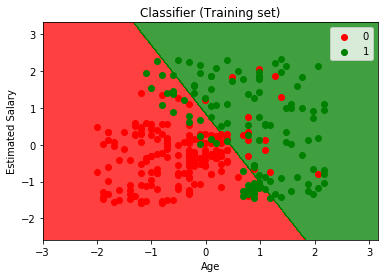

In [33]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

NameError: name 'y_test' is not defined